# Prieskumná analýza
### Opis dát spolu s ich charakteristikami 
* (počet záznamov, počet atribútov, ich typy, distribúcie, základné deskriptívne štatistiky a pod.).

### Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze
* , t. j., čo budete musieť v rámci predspracovania vyriešiť (aj s naznačením možností, ako tieto problémy plánujete v ďalšej fáze riešiť). Medzi problémy, na ktoré môžete v rámci analýzy naraziť, patria napr.:
* nevhodná štruktúra dát (dáta nie sú v tabuľkovej podobe alebo jedna entita je opísaná viacerými riadkami tabuľky)
* nejednotné formáty dát
* chýbajúce hodnoty
* vychýlené (odľahlé) hodnoty
* a ďalšie, t. j. v dátach sa môžu nachádzať aj iné, tu nevymenované problémy, ktoré tiež treba identifikovať a vo vašej analýze adresovať.

### V odovzdanej správe ( Jupyter Notebooku ) by ste tak mali vedieť zodpovedať na otázky: 
* Majú dáta vhodný formát pre ďalšie spracovanie? Ak nie, aké problémy sa v nich vyskytujú?
* Sú v dátach chýbajúce hodnoty? Ako sú reprezentované? Ako plánujete riešiť problém chýbajúcich hodnôt pre jednotlivé atribúty, resp. pozorovania? (Pre rôzne atribúty môže byť vhodné použiť rôzne stratégie.)
* Nadobúdajú niektoré atribúty nezmyselné (nekonzistentné) či inak výrazne odchýlené hodnoty? Ktoré?
* Ako plánujete v ďalšej fáze tieto identifikované problémy adresovať / riešiť?

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn
from sklearn import linear_model as lm

## Opis dát spolu s ich charakteristikami

In [25]:
%%bash 
head data/zadanie4/train.csv # Pozrieme sa na surové dáta, ci vyzerajú ako korektný csv file

In [26]:
data = pd.read_csv("data/zadanie4/train.csv")
data.head()

,Unnamed: 0,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,class,fnlwgt,education,education-num,relationship,capital-gain,capital-loss,hours-per-week,date_of_birth,personal_info
0,0,72.0,F,t,f,f,f,f,f,f,...,replacement therapy.|3560,140581,Some-college,1000,Unmarried,0.0,0,40,1946-02-03,Other-service|United-States\nWidowed -- privat...
1,1,52.0,F,f,f,f,f,f,f,f,...,negative.|311,180916,Some-college,10,Unmarried,0.0,0,38,1965-08-27,Adm-clerical|United-States\nSeparated -- Local...
2,2,62.0,M,F,f,f,f,f,f,f,...,negative.|3705,235853,HS-grad,-900,Husband,0.0,0,45,1955-04-15,Sales|United-States\nMarried-civ-spouse -- pri...
3,3,23.0,F,f,f,f,f,f,f,f,...,negative.|2668,121889,Some-college,10,Own-child,0.0,0,20,1994-03-26,Sales|United-States\nNever-married -- Private|...
4,4,63.0,F,t,f,f,f,f,f,f,...,replacement therapy.|1668,222490,Assoc-voc,11,Own_child,0.0,0,40,1955-01-21,Adm-clerical|United-States\nNever-married -- P...


## Vysvetlenie stĺpcov
id    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...

age    [72.0, 52.0, 62.0, 23.0, 63.0, 56.0, 84.0, 68....

sex    [F, M, ?]

**Liečba Hypotyreozi** (znížená prdukcia hormónu štítnej žlazy)
on thyroxine    [t, f, F, FALSE, T, TRUE] 
	• (Hypothyroidism means low thyroid hormone and you are taking Thyroxine (Levothyroxine) which is a thyroid hormone)
query on thyroxine    [f, t] - Vypytoval sa na liek na hypotyreozu, takze asi ma nejaké 
problémy s nou spojené

sick    [f, t] - je chory

pregnant    [f, t] - tehotná

**Liečba Hypertyreozi** (zvýšená produkcia hormónu štítnej žlazy) aj Goiter môže byť takto liečený

thyroid surgery    [f, t]  - chirurgický zákrok

I131 treatment    [f, t] - radioaktívna liečba

on antithyroid medication    [f, t] - medications—are a common treatment for hyperthyroidism, 

query hypothyroid    [f, t] - vypytoval sa na zníženú funkciu hormónu štítnej žlazy

query hyperthyroid    [f, t] - vypytoval sa na zvýšenú funkciu hormónu štítnej žlazy

lithium    [f, t] - liek používajúci sa na mentálne problémy alebo depresiu (depresia je 

jedným s príznakov hypotyroezi) 

goitre    [f, t] - ochorenie kde hormón štítnej zlazy opuchne

tumor    [f, t] - nádor

hypopituitary    [f, t] - https://www.webmd.com/a-to-z-guides/hypopituitary#1. Ochorenie 
spojene s mozgom. Môže spôsobiť zníženú produkciu hormónu štítnej žlazy

psych    [f, t]

TSH measured    [t, f] - https://www.webmd.com/a-to-z-guides/what-is-tsh-test#1 test na zistenie funkčnosti hormonu štítnej žlazy

TSH    [2.9, 0.2, 2.1, 0.02, 0.69, 3.0, 1.1, 26.0, 0.... - vysledky testu (tím ktorím nebol robený budu mať asi Nan)

T3 measured    [t, f] - https://www.healthline.com/health/t3 By measuring the T3 in your blood, your doctor may be able to determine if you have a thyroid problem.

T3    [1.2, nan, 1.7, 3.4, 1.1, 2.2, 0.3, 1.9, 1.6, ... - vysledky testu(tím ktorím nebol robený budu mať asi Nan)

TT4 measured    [t, f] - About 95% of thyroid hormone is bound to plasma proteins - thyroid binding globulin (TBG), constituting 'total thyroid hormone'. The remainder, approximately 5%, is 'free' in the circulation and therefore metabolically active. It's worth noting that T4 is a pro-hormone, which is converted into T3 by 5'-iodinase. T3 has a higher metabolic activity than T4, but has a shorter half-life. Taking this into account, I would say free T4 (FT4) is a good assessment of thyroid hormone levels. It would also be worth testing FT3, given that there can be issues in the conversion of T4 to T3. It may also be worth testing for thyroid stimulating hormone (TSH), which if elevated, along with a depressed FT4 result, is indicative of hypothyroidism. Here's some more 

TT4    [174.0, 105.0, 96.0, 91.0, 162.0, 122.0, 115.0...

T4U measured    [f, t]

T4U    [nan, 0.97, 1.1, 0.99, 1.13, 0.95, 0.8, 0.66, ...

FTI measured    [f, t]
dtype: object
FTI    [?, 108, 83, 163, 121, 7.6, 174, 165, 77, 107,...
dtype: object
TBG measured    [f]
dtype: object

TBG    [?]
dtype: object

referral source    [other, SVI, STMW, SVHC, SVHD]
dtype: object

class    [replacement therapy.|3560, negative.|311, neg...
dtype: object

personal_info - stĺpec nám hovori o osobných údajoch jedného pacienta. Tieto údaje bude treba rozdeliť do dalších stĺpcov. Podľa názornej hodnoty predpokladáme vznik nasledovných 4 stlpcov

Sales|United-States Married-civ-spouse -- Self-emp-inc|White
Other-service|United-States Never-married -- Private|Black

Práca|Štát Rodinný stav z minulosti-- Pracovný sektor|Rasa

date_of_birth  - tento stĺpec hovorí o dátume narodenia. Je potreba zjednotiť formát dátumov

hours-per-week  - myslím si, že stĺpec hovorí o pracovných hodinách. Môžeme predpokladať, že ľudia, ktorý pracujú viac hodín ako iný sú náchilnejší na choroby. Druhá možnosť mi napadá, že to môže byť počet hodín koľko sa treba venovať pacientovi.

capital-loss - strata kapitálu napríklad znamená keď investujeme do bitcoinov pri hodnote 9000 eur/ks ale cena bitcoinu začne prudko klesať a na sume 8000eur/ks spanikárime a predáme bitcoiny za nižšiu cenu za akú sme ich nakúpili. Toto vedie k stresu a to môže mať vplyv na ochorenie.

Capital-gain - je opakom capital-loss

Relationship - aktuálny stav

Education-num - https://en.wikipedia.org/wiki/Educational_stage

Education - Some-college,  HS-grad,  Assoc-voc,  Doctora...

Final sampling weight - treba zistit!!!


## Počet záznamov a počet atribútov

In [4]:
#data.info()
print(f"Počet záznamov (riadkov) : {data.shape[0]}")
print(f"Počet atribútov (stĺpcov): {data.shape[1]}")

Počet záznamov (riadkov) : 2800
Počet atribútov (stĺpcov): 40


## Názvy atribútov (stĺpcov) a ich dátové typy

In [5]:
#for name in data.columns:    print(name)
_ = data.dtypes

## Hodnoty atribútov pre prvý záznam

In [6]:
#loc[a,b] - filtrujeme zaznamy (riadky) z pola a podla atribútov (stlpcov) z pola b
_ = data.loc[:0, :].stack().reset_index(name='0')

## Deskriptívne štatistiky
[https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe]
DataFrame.describe(percentiles=None, include=None, exclude=None)

In [7]:
_ = data.describe() #vyluci NaN hodnoty
#data.describe(include='all') # zahrnie aj NaN values

## Počet riadkov a stĺpcov, ktoré majú aspoň jednu prázdnu hodnotu

## Počet riadkov s prázdnymi hodnotami

In [8]:
# data.shape[0] vráti celkový počet riadkov
# data.dropna() odstráni všetky riadky s prázdnymi hodnotami
# data.dropna().shape[0] - takto sme dostali počet riadkov, ktoré nemajú prázdne hodnoty
data.shape[0] - data.dropna().shape[0]

1100

## Počet stĺpcov s prázdnymi hodnotami

In [9]:
data.shape[1] - data.dropna(axis=1).shape[1]

7

# Identifikácia problémov v dátach spolu s predpokladaným scenárom riešenia v ďalšej fáze

## Nejednotné formáty dát

Dáta v stĺpcoch od "on thyroxine" do  ... sú nekonzistentné - rôzne vyjadrené True a False hodnoty. Tieto hodnoty musíme upraviť do tvaru True/False.

In [28]:
#Vypis unikátnych záznamov pre každý atribút 
dict_of_unique_values = [{i : list(data[i].unique())} for i in data.columns]

#for i in dict_of_unique_values: print(pd.Series(i))


Dáta v stĺpci education-num majú veľmi odľahlé krajné hodnoty

In [30]:
#sorted(data["education-num"].unique())
#data["education-num"].plot(kind="line")

Stĺpec "TBG" neobsahuje žiadne zmysluplné hodnoty. Tento stĺpec tým pádom môžeme odstrániť.

In [12]:
data["TBG"].unique()

array(['?'], dtype=object)

Atribút **TBG measured** obsahuje len jednu hodnotu a teda ho mozeme odstranit

In [13]:
data["TBG measured"].unique()

array(['f'], dtype=object)

Nedefinované pohlavie v niektorých riadkoch.

In [31]:
_ = data.loc[data['sex'] == "?"]

Kedže počet jedinečných riadkov v stĺpci 'Unnamed: 0' sa rovná počtu všetkých riadkov, dedukujeme, že sa jedná o identifikačný stĺpec a preto ho premenujeme na 'id'.

In [15]:
data['Unnamed: 0'].unique().size

2800

In [16]:
data = data.rename(columns={'Unnamed: 0': 'id'})

Veľmi veľká hraničná hodnota v stĺpci "age"

Vizualizácia extrémne odľahlých hodnôt v atribúte "age". Maximálna hodnota je 455.0. Riešenie tohto problému by bolo túto hodnotu prepíšeme na najčastejšie sa vyskytujúcu hodnotu v tomto stĺpci.


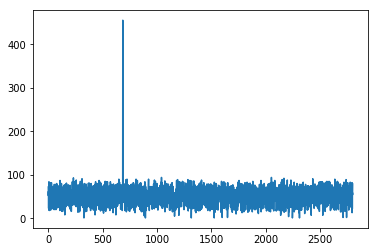

In [17]:
print(f"Vizualizácia extrémne odľahlých hodnôt v atribúte \"age\". Maximálna hodnota je {data['age'].max()}. Riešenie tohto problému by bolo túto hodnotu prepíšeme na najčastejšie sa vyskytujúcu hodnotu v tomto stĺpci.")
data["age"].plot(kind="line")


Nekonzistentné hodnoty v stĺpci "date_of_birth" - niektoré riadky majú len dátum, niektoré majú aj údaj o hodinách, niektoré majú NaN a pod... Stĺpce, ktoré obsahujú časový údaj na hodiny:minuty:sekundy musíme upraviť tak, aby tento údaj neobsahovali.

In [32]:
data["date_of_birth"].head()

0    1946-02-03
1    1965-08-27
2    1955-04-15
3    1994-03-26
4    1955-01-21
Name: date_of_birth, dtype: object

Hodnoty NaN v stĺpci "capital-gain". Tento problém by sme mohli riešiť, ak by sme hodnoty NaN nahradili pomocou modusu.

In [19]:
data["capital-gain"].unique()

array([    0.,    nan,  7688.,  7896., 99999.,  1173., 15024., 20051.,
        2228.,  7298.,  3325.,  2907., 15831.,  3942.,  4101.,  5178.,
        4650.,  4787.,  8614.,  1506.,  2829., 13550.,  5721.,   594.,
        3411.,  2977.,  2463., 14084.,  7430., 22040.,  2993.,  4064.,
        2346., 25236.,  6849.,  2174.,  3674.,  3137.,  1831.,  4386.,
        5013.,  2105.,  4687.,  2354.,  1111.,  6418.,  3103.,  3418.,
        4416.,  6723.,  2597.,  3464., 10520.,  2414.,  5455.,  3781.,
        6497.,  3908., 27828.,  1797.,  3273.,  7443.,  2176., 14344.,
        2036.,  2009.,  1055.,  2964., 15020.,  2290.,  1086.,  2202.])

Stĺpec s názvom "personal_info" by bolo dobré rozdeliť do viacero stĺpcov, pretože z tohto formátu nevyčítame nič. Jednotlivé vytvorené stĺpce budú mať názvy Profession, State, Family Status, Profession section, Skin color. Potom bude treba vyriešiť aj problémy s chýbajúcimi dátami v týchto vytvorených stĺpcoch. 

In [35]:
data["personal_info"].head()

0    Other-service|United-States\nWidowed -- privat...
1    Adm-clerical|United-States\nSeparated -- Local...
2    Sales|United-States\nMarried-civ-spouse -- pri...
3    Sales|United-States\nNever-married -- Private|...
4    Adm-clerical|United-States\nNever-married -- P...
Name: personal_info, dtype: object

Pri počítaní jednotlivých hodnôt v stĺpci "relationship" sme narazili na problém s nekonzistentnými dátami. Musíme ich upraviť na takú podobu, aby jednotlivé slová neboli oddelené pomlčkoiu, ale podtržníkom, t.j. máme dve hodnoty - other-relative a other_relative, ktoré očividne vyjadrujú to isté, ale sú ináč zapísané.

In [21]:
data.groupby("relationship").size()

relationship
 Husband           550
 Not-in-family     809
 Not_in_family      95
 Other-relative     80
 Other_relative      9
 Own-child         441
 Own_child          53
 Unmarried         510
 Wife              253
dtype: int64

Tu vidíme vizualizáciu jednotlivých hodnôt v stĺpci "relationship"

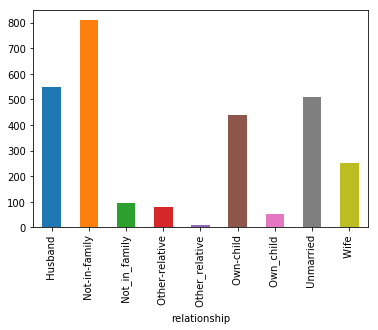

In [22]:
data.groupby("relationship").size().plot(kind="bar")

Tu vidíme počty jednotlivých hodnôt v stĺpci "education". V tomto stĺpci nenájdeme žiadne hodnoty, ktoré by vyzerali že vyjadrujú to isté ale sú zapísané ináč. Podobný výsledok chceme dostať aj pri stĺpci "relationship".

In [23]:
data.groupby("education").size()

education
 10th             79
 11th             97
 12th             54
 1st-4th          17
 5th-6th          24
 7th-8th          45
 9th              41
 Assoc-acdm      103
 Assoc-voc       130
 Bachelors       437
 Doctorate        25
 HS-grad         894
 Masters         138
 Preschool         4
 Prof-school      42
 Some-college    670
dtype: int64

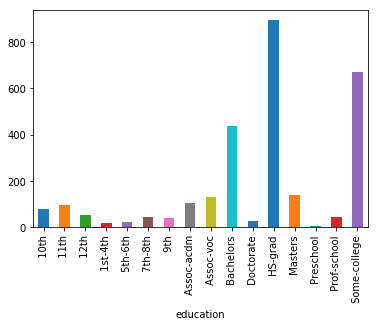

In [24]:
data.groupby("education").size().plot(kind="bar")